In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [6]:
# Download latest version
path = kagglehub.dataset_download("guillemservera/us-treasury-yields-daily")

print("Path to dataset files:", path)

Path to dataset files: /Users/hermankhivrenko/.cache/kagglehub/datasets/guillemservera/us-treasury-yields-daily/versions/291


In [8]:
import pandas as pd


df = pd.read_csv("/Users/hermankhivrenko/.cache/kagglehub/datasets/guillemservera/us-treasury-yields-daily/versions/291/us_treasury_yields_daily.csv")
df

,date,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16294,2024-06-17,5.45,5.52,5.39,5.11,4.75,4.50,4.30,4.28,4.28,4.52,4.40
16295,2024-06-18,5.40,5.50,5.37,5.09,4.69,4.43,4.24,4.22,4.22,4.47,4.36
16296,2024-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,2024-06-20,5.42,5.50,5.37,5.10,4.70,4.45,4.26,4.25,4.25,4.49,4.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16299 entries, 0 to 16298
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    16299 non-null  object 
 1   US1M    5726 non-null   float64
 2   US3M    10702 non-null  float64
 3   US6M    10702 non-null  float64
 4   US1Y    15604 non-null  float64
 5   US2Y    12012 non-null  float64
 6   US3Y    15604 non-null  float64
 7   US5Y    15604 non-null  float64
 8   US7Y    13734 non-null  float64
 9   US10Y   15604 non-null  float64
 10  US20Y   13915 non-null  float64
 11  US30Y   11834 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.5+ MB
None


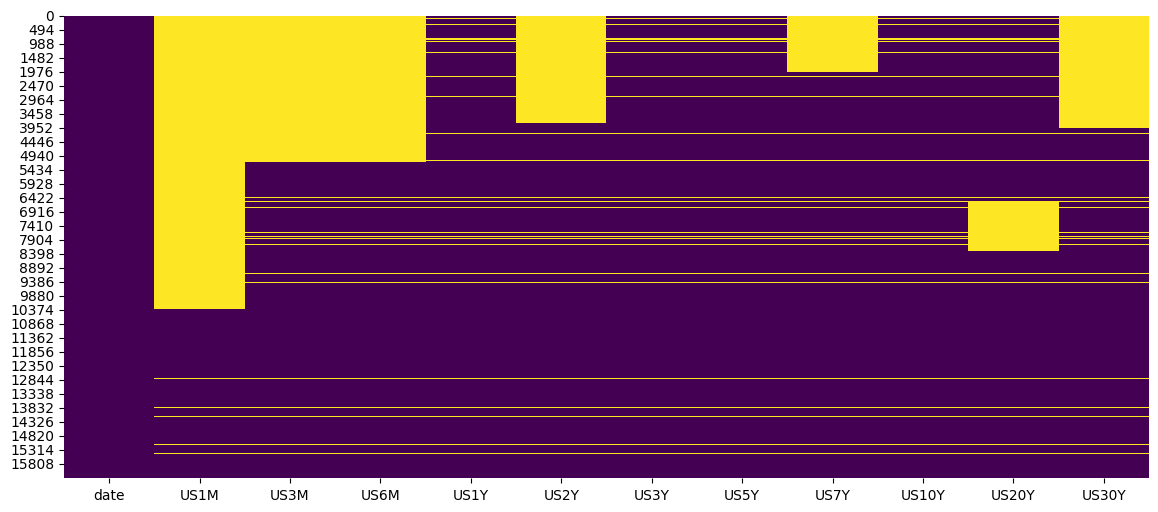

In [18]:
print(df.info())

plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()

In [19]:
df.dropna(inplace=True)

In [20]:
df

,date,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
10325,2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
10326,2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53
10327,2001-08-02,3.65,3.53,3.46,3.57,3.89,4.17,4.69,4.97,5.17,5.68,5.57
10328,2001-08-03,3.63,3.52,3.47,3.57,3.91,4.22,4.72,4.99,5.20,5.70,5.59
10329,2001-08-06,3.62,3.52,3.47,3.56,3.88,4.17,4.71,4.99,5.19,5.70,5.59
...,...,...,...,...,...,...,...,...,...,...,...,...
16293,2024-06-14,5.47,5.51,5.36,5.07,4.67,4.41,4.22,4.20,4.20,4.46,4.34
16294,2024-06-17,5.45,5.52,5.39,5.11,4.75,4.50,4.30,4.28,4.28,4.52,4.40
16295,2024-06-18,5.40,5.50,5.37,5.09,4.69,4.43,4.24,4.22,4.22,4.47,4.36
16297,2024-06-20,5.42,5.50,5.37,5.10,4.70,4.45,4.26,4.25,4.25,4.49,4.39


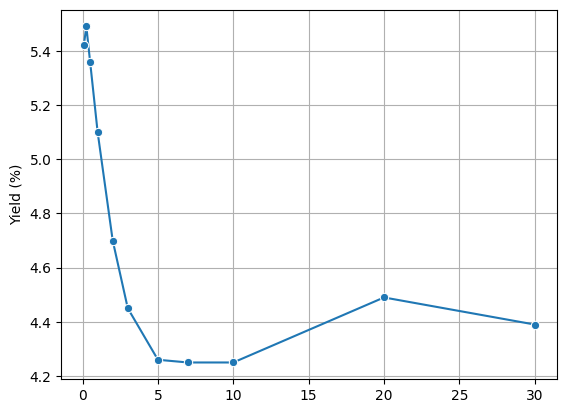

In [36]:
yield_y = [val for val in df.iloc[-1].drop(["date"])]
# yield_x = list(range(len(yield_y)))
yield_x = [1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

plt.figure()
sns.lineplot(x=yield_x, y=yield_y, marker='o')
plt.ylabel("Yield (%)")
plt.grid(True)
plt.show()

# Bond Price Formula

For a bond with **face value** `F`, **coupon rate** `r_c`, **maturity** `T` (in years), **yield to maturity** `y`, and **coupon frequency** `m` (payments per year):

$$
\begin{flalign}
P = \sum_{t=1}^{n} \frac{C}{(1 + y/m)^t} + \frac{F}{(1 + y/m)^n}
&&
\end{flalign}
$$

Where:  

$$
\begin{flalign}
C = \frac{F \cdot r_c}{m}, \quad n = T \cdot m
&&\end{flalign}
$$

- `P` = bond price  
- `C` = coupon payment per period  
- `F` = face value (par value)  
- `y` = yield to maturity (annual)  
- `m` = number of payments per year (e.g., 2 for semiannual)  
- `n` = total number of periods  

This formula can be used to calculate bond prices for **different yields**, which is useful for plotting **price–yield curves** or computing **duration**.

# Simplified Bond Price Formula (Par Bond, Annual Coupons)

For a bond with **face value** `F`, **maturity** `T` years, and **coupon rate = YTM (y)**, paid **once per year**:

$$
\begin{flalign}
P = \sum_{t=1}^{T} \frac{C}{(1 + y)^t} + \frac{F}{(1 + y)^T}
&&\end{flalign}
$$

Where:

$$
\begin{flalign}
C = F \cdot y
&&\end{flalign}
$$

- `P` = bond price  
- `C` = annual coupon payment  
- `F` = face value (par value)  
- `y` = yield to maturity (annual)  
- `T` = number of years to maturity  

Note: Since coupon = YTM, the bond trades at **par value**: `P = F`.

In [50]:
ge_1y_mat_rates = df.tail(1).drop(columns=["date", "US1M", "US3M", "US6M"])
ge_1y_mat_rates

In [47]:
def calc_price(c_rate, y, T):
    F = 100
    C = F * c_rate
    return sum([C / (1 + y)**t for t in range(1, T + 1)]) + F / (1 + y)**T

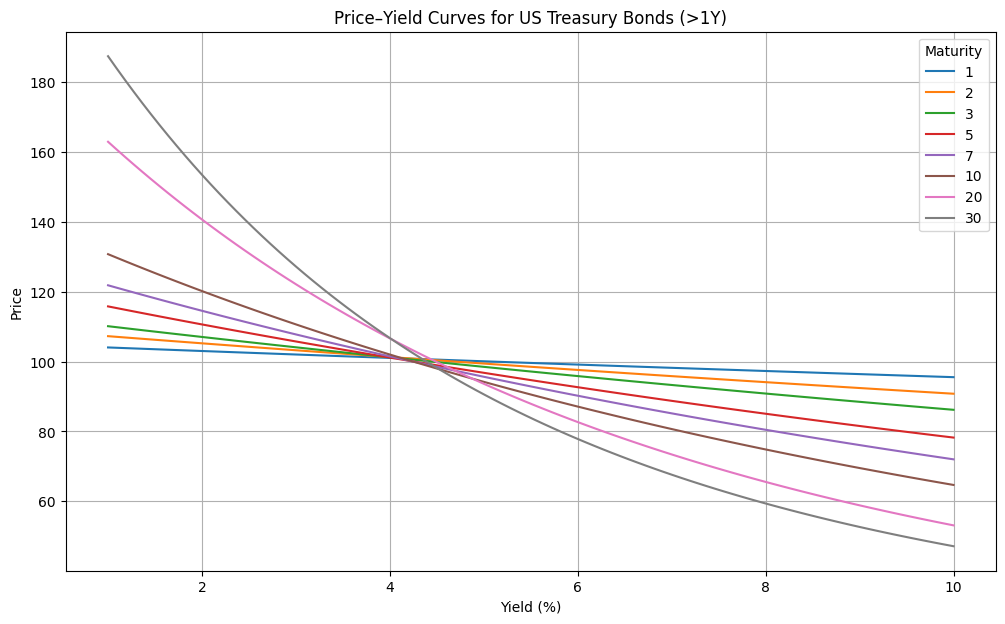

In [58]:
T_list = [1, 2, 3, 5, 7, 10, 20, 30]
c_rate_list = list(ge_1y_mat_rates.iloc[0] / 100)
yields_range = np.linspace(0.01, 0.10, 100)

plt.figure(figsize=(12,7))

for i in range(len(T_list)):
    T = T_list[i]
    c_rate = c_rate_list[i]
    prices = [calc_price(c_rate, y, T) for y in yields_range]
    
    sns.lineplot(x=yields_range*100, y=prices, label=T)

plt.xlabel("Yield (%)")
plt.ylabel("Price")
plt.title("Price–Yield Curves for US Treasury Bonds (>1Y)")
plt.grid(True)
plt.legend(title="Maturity")
plt.show()